Marcos Lopes -- fevereiro de 2025

# Tokenização

**Texto a analisar**

In [1]:
# Notar o uso do apóstrofo
texto = "O rato roeu a roupa do Rei de Roma. Em seguida, jogou-se n'água do Mar Tirreno... Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00."

**Manual**

In [2]:
tokens = texto.split()
print(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma.', 'Em', 'seguida,', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto:', 'R$', '10.000,00.']


**NLTK**

Vantagens:

*   O tokenizador considera especificidades linguísticas, como apóstrofos e hífens.
*   É possível tokenizar não só palavras, mas também sentenças.

In [3]:
# Importação do módulo e dos recursos necessários
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [4]:
# Tokenização de palavras e pontuação

word_tokenize(texto, language='portuguese')

['O',
 'rato',
 'roeu',
 'a',
 'roupa',
 'do',
 'Rei',
 'de',
 'Roma',
 '.',
 'Em',
 'seguida',
 ',',
 'jogou-se',
 "n'água",
 'do',
 'Mar',
 'Tirreno',
 '...',
 'Calcula-se',
 'que',
 'o',
 'prejuízo',
 'tenha',
 'sido',
 'alto',
 ':',
 'R',
 '$',
 '10.000,00',
 '.']

In [5]:
# Tokenização de sentenças

sent_tokenize(texto, language='portuguese')

['O rato roeu a roupa do Rei de Roma.',
 "Em seguida, jogou-se n'água do Mar Tirreno...",
 'Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.']

**spaCy**

Vantagem:

*   É o que mais bem funciona em geral.

Desvantagens:


*   Os modelos têm de estar pré-instalados;
*   O carregamento dos modelos na memória é lento;
*   Ocupa mais memória que o NLTK.


In [6]:
# Instalação/atualização do spaCy e dos modelos de língua
!pip install -U spacy

!python -m spacy download pt_core_news_sm  # Notar o "sm": Small Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13

In [7]:
# Importação do módulo e do modelo de língua
import spacy
!python -m spacy info  # P/ checar a versão (tem de ser >= 3.0)
nlp = spacy.load('pt_core_news_sm')

/usr/local/lib/python3.11/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)

============================== Info about spaCy ==============================

spaCy version    3.8.4                         
Location         /usr/local/lib/python3.11/dist-packages/spacy
Platform         Linux-6.1.85+-x86_64-with-glibc2.35
Python version   3.11.11                       
Pipelines        pt_core_news_sm (3.8.0), en_core_web_sm (3.7.1)



In [22]:
# Tokenização de palavras e pontuação

def tokenizar(sentenca: str) -> list:
    doc = nlp(sentenca)
    return [t.text for t in doc]  # Lista de atributos .text de cada token

tokens = tokenizar(texto)
print(tokens)
len(tokens)

['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'Rei', 'de', 'Roma', '.', 'Em', 'seguida', ',', 'jogou-se', "n'água", 'do', 'Mar', 'Tirreno', '...', 'Calcula-se', 'que', 'o', 'prejuízo', 'tenha', 'sido', 'alto', ':', 'R$', '10.000,00', '.']


30

In [24]:
# Tokenização de sentenças

def sents(sentencas: str) -> list:
    doc = nlp(sentencas)
    return doc.sents

for s in sents(texto):
    print(s)

O rato roeu a roupa do Rei de Roma.
10
Em seguida, jogou-se n'água do Mar Tirreno...
9
Calcula-se que o prejuízo tenha sido alto: R$ 10.000,00.
11


# Limpeza

In [10]:
# Aqui vai uma função simples que normaliza a caixa dos caracteres (para minúsculas)
# e elimina os símbolos não-alfabéticos (pontuação, números...)

def limpar(lista_de_palavras: list) -> list:
    return [i.lower() for i in lista_de_palavras if i.isalpha()]

In [11]:
limpar(tokenizar(texto))

['o',
 'rato',
 'roeu',
 'a',
 'roupa',
 'do',
 'rei',
 'de',
 'roma',
 'em',
 'seguida',
 'do',
 'mar',
 'tirreno',
 'que',
 'o',
 'prejuízo',
 'tenha',
 'sido',
 'alto']

# Palavras vazias

**NLTK**

*   Uma lista pequena, mas rápida de se carregar.

In [12]:
nltk.download('stopwords')
stops_nltk = nltk.corpus.stopwords.words('portuguese')

len(stops_nltk)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


207

**spaCy**


*   Uma lista mais abrangente, mas mais lenta e com mais exigência de memória para carregar o modelo.
* Atenção! A "lista" do spaCy é, na verdade, um conjunto (set).




In [13]:
stops_spacy = nlp.Defaults.stop_words

len(stops_spacy)

416

**União das duas listas**

In [14]:
stops = set(stops_nltk) | stops_spacy

len(stops)

500

# Stemização
Exclusivamente no NLTK

In [15]:
# Carregamento do stemizador
nltk.download('rslp')
raiz = nltk.stem.RSLPStemmer().stem

print(raiz('nada'))
print(raiz('nadinha'))
print(raiz('nadabóbora'))

[nltk_data] Downloading package rslp to /root/nltk_data...


nad
nad
nadabób


[nltk_data]   Unzipping stemmers/rslp.zip.


# Lematização


*   Exclusivamente no spaCy
*   O resultado tem muitos erros, mas, quando se usa o modelo grande de língua, a performance melhora.



In [16]:
# Baixando o modelo de língua grande (lg) para o português
!python -m spacy download pt_core_news_lg

nlp = spacy.load('pt_core_news_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 958.3 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
def lema(sentenca: str) -> list:
    doc = nlp(sentenca)
    return [token.lemma_ for token in doc]

print(lema('Se estas palavras fossem lematizadas, ficariam muitíssimo diferentes.'))

['se', 'este', 'palavra', 'ser', 'lematizar', ',', 'ficar', 'muitíssimo', 'diferente', '.']


# Hápax Legômena

In [18]:
# Para criar uma lista de hápax legômena
def hapax(lista_de_palavras: list) -> list:
    return [i for i in lista_de_palavras if lista_de_palavras.count(i) == 1]

# Para eliminá-los da lista de tokens
def sem_hapax(lista_de_palavras):
    return [i for i in lista_de_palavras if lista_de_palavras.count(i) > 1]

In [19]:
verso = limpar(tokenizar('boi, boi, boi, boi da cara preta'))
print(verso)
print(hapax(verso))
print(sem_hapax(verso))

['boi', 'boi', 'boi', 'boi', 'da', 'cara', 'preta']
['da', 'cara', 'preta']
['boi', 'boi', 'boi', 'boi']


# Mãos à obra!
Vamos trabalhar com a leitura de um arquivo de texto bruto e aplicação do pipeline completo de pré-processamento dos dados e a contagem das unidades lexicais que vimos até agora. Usaremos o livro "O Guarani", de José de Alencar, que está disponível para download na plataforma AlunoWeb.

**Exercícios**

1. Abra o arquivo "Guarani.txt" e calcule:

*   O número total de caracteres
*   O número de caracteres sem espaços em branco
*   O número de palavras (dica: para um trabalho de boa qualidade, tokenize e limpe o texto)


2. Mostre as 20 palavras mais frequentes do texto em ordem descrescente de ocorrência.

* Dica: use a função Counter() da biblioteca `collections`.

3. Discuta o resultado. Qual a característica mais evidente dessas palavras frequentes?

4. Calcule:
*   O vocabulário do livro (o número de lemas)

5. Reduza os tokens a raízes.
* O conjunto das raízes é maior ou menor que o vocabulário (de lemas)?
* Discuta as vantagens e os riscos implicados no uso de um ou outro.


6. Crie uma lista dos hápax legômena e responda:
* Qual a proporção de hápax legômena no vocabulário?
* Exiba os 50 primeiros hápax legômena da sua lista. Baseando-se no que você vê, será que existem traços em comum entre eles?  Discuta se poderiam ser eliminados sem prejuízo para uma análise do conteúdo do texto.

7. Crie uma versão do livro "privilegiando o conteúdo": uma lista sem hápax legômena, sem palavras vazias e com as palavras restantes stemizadas.
* Compare o número de tokens desse "livro" com o primeiro cálculo de tokens, aquele sobre o texto original.


# Bônus: Geração de nuvens de palavras

In [20]:
texto_minusc = texto.lower()

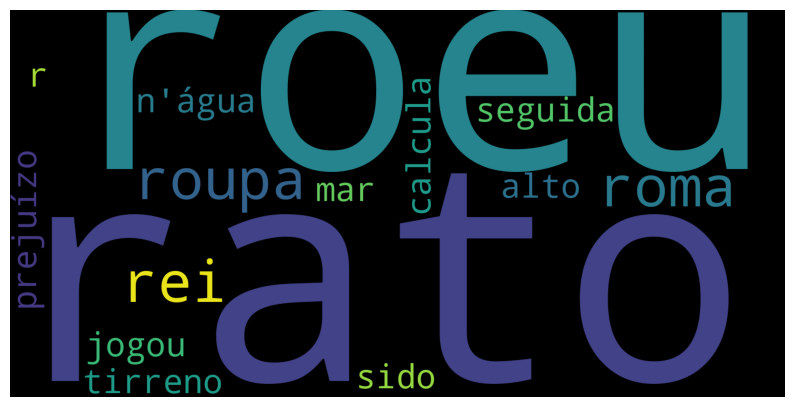

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nuvem = WordCloud(stopwords=stops,
                    background_color='black',
                    width=1600, height=800).generate(texto_minusc)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(nuvem, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(nuvem);